In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
survived=train_df["Survived"]
train_df=train_df.drop(["Survived"],axis=1)
display(train_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_idx=train_df["PassengerId"]
test_idx=test_df["PassengerId"]

combined_df=pd.concat([train_df,test_df]).reset_index(drop=True)

display(combined_df)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
combined_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
combined_df["Age"].value_counts()

Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
60.50     1
11.50     1
0.33      1
0.17      1
38.50     1
Name: count, Length: 98, dtype: int64

In [8]:
combined_df[["Pclass","Age"]]

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
1304,3,NaN
1305,1,39.0
1306,3,38.5
1307,3,NaN


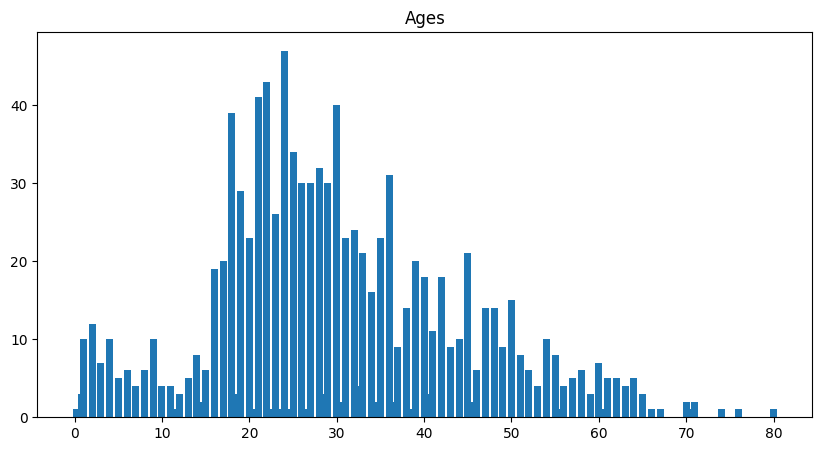

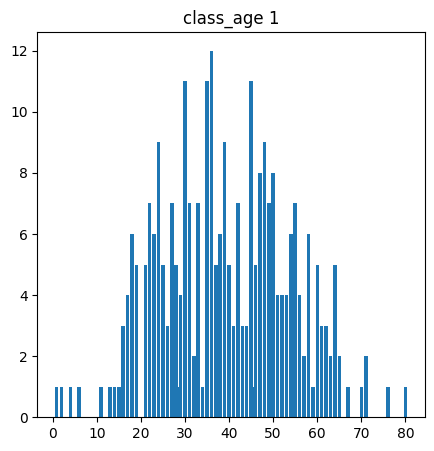

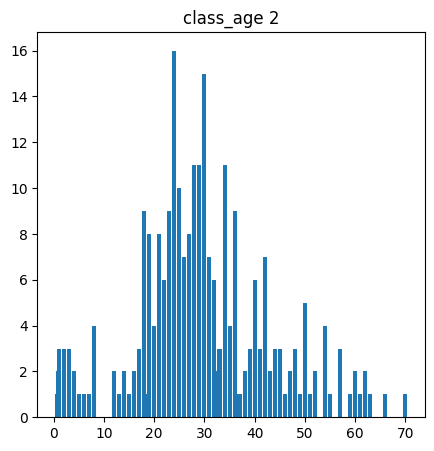

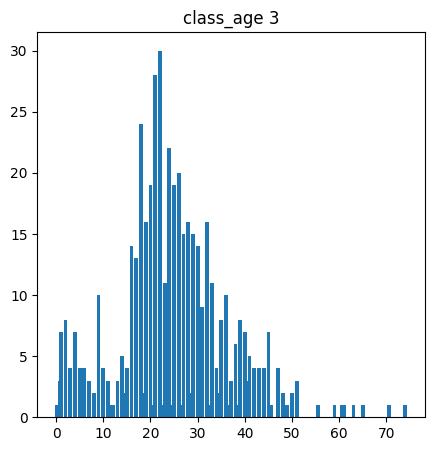

         Age
Pclass      
1       39.0
2       29.0
3       24.0


In [9]:
y=combined_df["Age"].value_counts()
x=y.index.values
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title("Ages")
plt.show()



class_age=combined_df[["Pclass","Age"]]

for i in range(1,4):
    plt.figure(figsize=(5,5))
    y=class_age[class_age["Pclass"]==i]["Age"].value_counts()
    x=y.index.values
    plt.bar(x,y)
    plt.title("class_age "+str(i))
    plt.show()


medians=class_age.groupby("Pclass").median()
print(medians)

In [10]:
for i in range(3):

    idx = np.where((combined_df["Pclass"] == i + 1) & (combined_df["Age"].isnull()))[0]
    
   
    if len(idx) > 0:
        combined_df.loc[idx, "Age"] = medians.values[i][0]

display(combined_df)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [11]:
combined_df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
combined_df[combined_df["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Median  8.05


C:\Users\Ömer Taha\AppData\Local\Temp\ipykernel_5772\3273185735.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df["Fare"].fillna(fares_sim.median(),inplace=True)


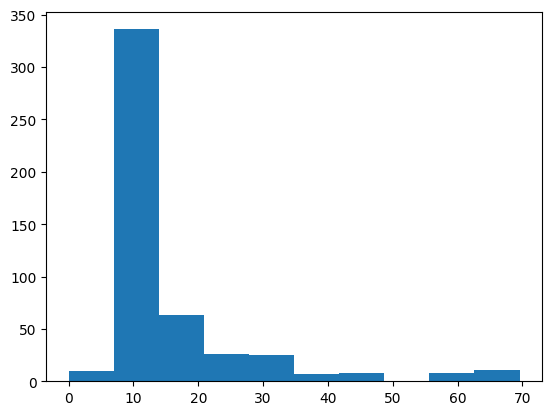

In [13]:
fares_sim=combined_df[(combined_df["Pclass"]==3)& (combined_df["Embarked"]=="S")]["Fare"]
print("Median ",fares_sim.median())

plt.hist(fares_sim)
plt.plot()


combined_df["Fare"].fillna(fares_sim.median(),inplace=True)


In [14]:

display(combined_df[combined_df["Embarked"].isnull()])
emb_sim=combined_df[(combined_df["Pclass"]==1)& (combined_df["Fare"]>=70)&(combined_df["Fare"]<=90)]["Embarked"]


print(emb_sim.value_counts())

combined_df["Embarked"].fillna("C",inplace=True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


C:\Users\Ömer Taha\AppData\Local\Temp\ipykernel_5772\1085568802.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df["Embarked"].fillna("C",inplace=True)


In [15]:
combined_df[(combined_df["Pclass"]==1)& (combined_df["Fare"]>=70)&(combined_df["Fare"]<=90)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
34,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,C
62,63,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
102,103,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
139,140,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
218,219,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
224,225,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S


In [16]:
combined_df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [17]:
combined_df["Cabin"].fillna("N",inplace=True)
combined_df["Cabin"]=combined_df["Cabin"].str[0]

print(combined_df["Cabin"].value_counts())


idx=np.where(combined_df["Cabin"]=="T")[0]
combined_df.loc[idx,"Cabin"]="N"


Cabin
N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


C:\Users\Ömer Taha\AppData\Local\Temp\ipykernel_5772\994205252.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df["Cabin"].fillna("N",inplace=True)


In [18]:
print(combined_df["Cabin"].value_counts())

Cabin
N    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: count, dtype: int64


In [19]:
display(combined_df)
print(combined_df.isna().sum())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,N,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,N,S


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [20]:
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [21]:
combined_df.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
dtype: int64

In [22]:
combined_df["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [23]:
combined_df["Name"].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [24]:
names=combined_df["Name"].values

first_names=[]
last_names=[]
titles=[]

for name in names:
    if("," not in name):
        last_names.append("")
    else:
        last,name=name.split(", ",1)
        last_names.append(last)
    

    if("." not in name):
        titles.append("")
    else:
        title,first=name.split(". ",1)
        titles.append(title)
        first_names.append(first)


last_names=np.array(last_names)

titles=np.array(titles)

first_names=np.array(first_names)





idx=np.where(np.isin(titles,["Capt","Col","Major"]))

titles[idx]="Military"

idx=np.where(np.isin(titles,["Don","Dona","Jonkheer","Lady","Master","the Countess","Sir"]))

titles[idx]="Nobility"

idx=np.where(np.isin(titles,["Miss","Mlle","Ms"]))

titles[idx]="Ms"

idx=np.where(np.isin(titles,["Mrs","Mme"]))

titles[idx]="Mrs"

print(np.unique(titles))

combined_df["Title"]=titles

display(combined_df)


['Dr' 'Military' 'Mr' 'Mrs' 'Ms' 'Nobility' 'Rev']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Ms
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,N,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,N,S,Mr


In [25]:
combined_df["Age"].min(),combined_df["Age"].max()

(np.float64(0.17), np.float64(80.0))

In [26]:
bins=np.array([0,10,20,30,40,50,60,70,80])

combined_df["Age_bin"]=pd.cut(combined_df["Age"],bins)


display(combined_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Ms,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,N,S,Mr,"(20, 30]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S,Mr,"(30, 40]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,N,S,Mr,"(20, 30]"


In [27]:
ticked_dict=dict(combined_df["Ticket"].value_counts())
ticked_dict

{'CA. 2343': np.int64(11),
 '1601': np.int64(8),
 'CA 2144': np.int64(8),
 '347082': np.int64(7),
 'S.O.C. 14879': np.int64(7),
 '3101295': np.int64(7),
 'PC 17608': np.int64(7),
 '347077': np.int64(7),
 '382652': np.int64(6),
 '113781': np.int64(6),
 '19950': np.int64(6),
 '347088': np.int64(6),
 'W./C. 6608': np.int64(5),
 '349909': np.int64(5),
 '220845': np.int64(5),
 '4133': np.int64(5),
 '16966': np.int64(5),
 'PC 17757': np.int64(5),
 '113503': np.int64(5),
 'C.A. 34651': np.int64(4),
 'SC/Paris 2123': np.int64(4),
 '24160': np.int64(4),
 'C.A. 2315': np.int64(4),
 'W./C. 6607': np.int64(4),
 '36928': np.int64(4),
 '12749': np.int64(4),
 '230136': np.int64(4),
 '2666': np.int64(4),
 'PC 17483': np.int64(4),
 'C.A. 33112': np.int64(4),
 '17421': np.int64(4),
 '113760': np.int64(4),
 'PC 17760': np.int64(4),
 'PC 17755': np.int64(4),
 'LINE': np.int64(4),
 '345773': np.int64(3),
 'A/4 48871': np.int64(3),
 '315153': np.int64(3),
 '28220': np.int64(3),
 'PC 17761': np.int64(3),
 '3

In [28]:
combined_df["Tkt_count"]=combined_df["Ticket"].map(ticked_dict)


display(combined_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin,Tkt_count
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr,"(20, 30]",1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Ms,"(20, 30]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr,"(30, 40]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,N,S,Mr,"(20, 30]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S,Mr,"(30, 40]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,N,S,Mr,"(20, 30]",1


0.0 128.0823


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin,Tkt_count,Fare_per_ticket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr,"(20, 30]",1,"(0, 20]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,"(20, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Ms,"(20, 30]",1,"(0, 20]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,"(20, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr,"(30, 40]",1,"(0, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,N,S,Mr,"(20, 30]",1,"(0, 20]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,"(20, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S,Mr,"(30, 40]",1,"(0, 20]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,N,S,Mr,"(20, 30]",1,"(0, 20]"


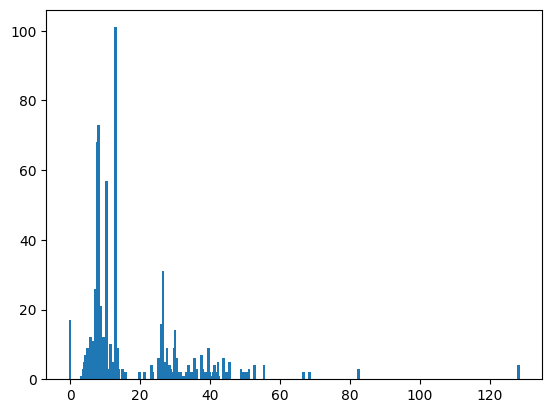

In [29]:
combined_df["Fare_per_ticket"]=combined_df["Fare"]/combined_df["Tkt_count"]

plt.bar(combined_df["Fare_per_ticket"].value_counts().index.values,combined_df["Fare_per_ticket"].value_counts())

print(combined_df["Fare_per_ticket"].min(),combined_df["Fare_per_ticket"].max())
bins=[0,20,40,60,80,150]

combined_df["Fare_per_ticket"]=pd.cut(combined_df["Fare_per_ticket"],bins)


display(combined_df)

In [30]:
combined_df["Family_size"]=combined_df["Parch"]+combined_df["SibSp"]+1

combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin,Tkt_count,Fare_per_ticket,Family_size
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Mr,"(20, 30]",1,"(0, 20]",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,"(20, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Ms,"(20, 30]",1,"(0, 20]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,"(20, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Mr,"(30, 40]",1,"(0, 20]",1


In [31]:
combined_df=combined_df.drop(["Name","Age","Ticket","Fare","Tkt_count","Fare_per_ticket"],axis=1)

combined_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_bin,Family_size
0,1,3,male,1,0,N,S,Mr,"(20, 30]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]",2
2,3,3,female,0,0,N,S,Ms,"(20, 30]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]",2
4,5,3,male,0,0,N,S,Mr,"(30, 40]",1


In [32]:
combined_df.nunique()

PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Parch             8
Cabin             8
Embarked          3
Title             7
Age_bin           8
Family_size       9
dtype: int64

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [34]:
combined_df.set_index("PassengerId",inplace=True)
combined_df.head()


,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_bin,Family_size
PassengerId,,,,,,,,,
1,3,male,1,0,N,S,Mr,"(20, 30]",2
2,1,female,1,0,C,C,Mrs,"(30, 40]",2
3,3,female,0,0,N,S,Ms,"(20, 30]",1
4,1,female,1,0,C,S,Mrs,"(30, 40]",2
5,3,male,0,0,N,S,Mr,"(30, 40]",1


In [35]:
from sklearn.preprocessing import LabelEncoder

label_enc=combined_df.copy()

label_enc=label_enc.astype(str)

label_enc=label_enc.apply(LabelEncoder().fit_transform)

label_enc.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_bin,Family_size
PassengerId,,,,,,,,,
1,2,1,1,0,7,2,2,2,2
2,0,0,1,0,2,0,3,3,2
3,2,0,0,0,7,2,4,2,0
4,0,0,1,0,2,2,3,3,2
5,2,1,0,0,7,2,2,3,0


In [36]:
one_hot=label_enc.copy()
one_hot=pd.get_dummies(one_hot,columns=["Sex","Embarked","Title"])

display(one_hot)

,Pclass,SibSp,Parch,Cabin,Age_bin,Family_size,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,2,False,True,False,False,True,False,False,True,False,False,False,False
2,0,1,0,2,3,2,True,False,True,False,False,False,False,False,True,False,False,False
3,2,0,0,7,2,0,True,False,False,False,True,False,False,False,False,True,False,False
4,0,1,0,2,3,2,True,False,False,False,True,False,False,False,True,False,False,False
5,2,0,0,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,2,0,False,True,False,False,True,False,False,True,False,False,False,False
1306,0,0,0,2,3,0,True,False,True,False,False,False,False,False,False,False,True,False
1307,2,0,0,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False


In [37]:
x=one_hot.loc[train_idx].values
y=survived.values

scaler=MinMaxScaler()
scaler.fit(x)

x_scaled=scaler.fit_transform(x)


x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.2,random_state=0)


In [38]:
classifer=RandomForestClassifier(random_state=0)
classifer.fit(x_train,y_train).score(x_test,y_test)

0.7988826815642458

In [39]:
params = {
    "criterion": ["gini", "entropy"],  
    "n_estimators": [20, 50, 100, 200, 300, 400, 500, 800, 1000],
    "max_depth": np.arange(3, 50),
    "min_samples_split": np.arange(1, 1000),  
    "max_features": ["sqrt", "log2"],
    "max_samples": np.linspace(0.1, 0.9, 10)
}

rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=0), params, scoring="accuracy", random_state=0, cv=5)

rand_search.fit(x_train, y_train)

rand_params = rand_search.best_params_

print(rand_params, "\n")

print("train Acc", rand_search.best_score_)

preds = rand_search.predict(x_test)

print("test Acc", accuracy_score(preds, y_test))

{'n_estimators': 200, 'min_samples_split': np.int64(16), 'max_samples': np.float64(0.6333333333333333), 'max_features': 'sqrt', 'max_depth': np.int64(49), 'criterion': 'gini'} 

train Acc 0.8300403821530582
test Acc 0.8212290502793296


C:\Users\Ömer Taha\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [40]:
rand_params

{'n_estimators': 200,
 'min_samples_split': np.int64(16),
 'max_samples': np.float64(0.6333333333333333),
 'max_features': 'sqrt',
 'max_depth': np.int64(49),
 'criterion': 'gini'}